In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('./상가업소정보.csv', sep='|')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [8]:
df.size

22373520

In [9]:
df.shape

(573680, 39)

In [11]:
df['시도명'].unique()

array(['서울특별시', '부산광역시'], dtype=object)

In [13]:
df_seoul=df[df['시도명']=='서울특별시'].copy()

In [17]:
df_seoul.shape

(407376, 39)

In [19]:
df_seoul['시도명'].nunique()

1

In [47]:
import numpy as np

In [31]:
df_seoul['상호명_소문자']=df_seoul['상호명'].str.lower()

In [41]:
df_31=df_seoul[df_seoul['상호명_소문자'].str.contains('베스킨라빈스|던킨|dunkin|배스킨라빈스|baskin')]

In [42]:
df_31.shape

(657, 40)

In [51]:
df_31[~df_31['상호명_소문자'].str.contains('베스킨|배스킨|baskin')].isnull().sum()

상가업소번호         0
상호명            0
지점명           57
상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
표준산업분류코드       0
표준산업분류명        0
시도코드           0
시도명            0
시군구코드          0
시군구명           0
행정동코드          0
행정동명           0
법정동코드          0
법정동명           0
지번코드           0
대지구분코드         0
대지구분명          0
지번본번지          0
지번부번지         63
지번주소           0
도로명코드          0
도로명            0
건물본번지          0
건물부번지        176
건물관리번호         0
건물명           40
도로명주소          0
구우편번호          0
신우편번호          0
동정보          180
층정보           49
호정보          151
경도             0
위도             0
상호명_소문자        0
dtype: int64

In [52]:
df_31['상권업종대분류명'].value_counts()

음식       655
생활서비스      1
소매         1
Name: 상권업종대분류명, dtype: int64

In [59]:
byebye=df_31[df_31['상권업종대분류명'].isin(['소매', '생활서비스'])].index

In [60]:
df_31.shape

(657, 40)

In [63]:
df_31.drop(byebye, axis=0,inplace=True)

C:\Users\14112\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
df_31.shape

(655, 40)

In [67]:
df_31

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호명_소문자
76,20665694,배스킨라빈스,관악구청점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,NaN,서울특별시 관악구 관악로 161,151050,8787.0,NaN,1,NaN,126.952166,37.479599,배스킨라빈스
1167,2986690,던킨도너츠,이대1호점,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,NaN,서울특별시 서대문구 이화여대길 56,120808,3765.0,NaN,NaN,NaN,126.945369,37.559263,던킨도너츠
1819,19972402,던킨도너츠테크노마트점,테크노마트점,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,테크노마트,서울특별시 광진구 광나루로56길 85,143721,5116.0,NaN,1,NaN,127.095681,37.535713,던킨도너츠테크노마트점
2164,20017778,베스킨라빈스,NaN,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,NaN,서울특별시 마포구 와우산로 88,121837,4067.0,NaN,NaN,NaN,126.923809,37.552104,베스킨라빈스
2305,20304915,던킨도너츠창동하나로,NaN,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,하나로클럽마트,서울특별시 도봉구 마들로11길 20,132720,1413.0,NaN,1,NaN,127.050818,37.655101,던킨도너츠창동하나로
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558894,16238189,DUNKINDOONUTS,NaN,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,홍우빌딩,서울특별시 서초구 강남대로 373,137858,6621.0,NaN,1,NaN,127.027989,37.495971,dunkindoonuts
560984,16148489,던킨도너츠,왕십리민자역사점,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,NaN,서울특별시 성동구 왕십리광장로 17,133866,4750.0,NaN,NaN,NaN,127.038379,37.561436,던킨도너츠
561929,16150533,배스킨라빈스31,송파하비오점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,파크하비오,서울특별시 송파구 송파대로 111,138888,5837.0,NaN,NaN,NaN,127.124872,37.479617,배스킨라빈스31
561930,16148456,배스킨라빈스31,강일동점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,중앙프라자,서울특별시 강동구 아리수로 427,134100,5211.0,NaN,NaN,NaN,127.174586,37.564954,배스킨라빈스31


In [69]:
df_31.loc[df_31['상호명'].str.contains('베스킨|배스킨|baskin'), '브랜드명']='배스킨라빈스'
df_31.loc[~df_31['상호명'].str.contains('베스킨|배스킨|baskin'), '브랜드명']='던킨도너츠'

C:\Users\14112\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\14112\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [75]:
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:>

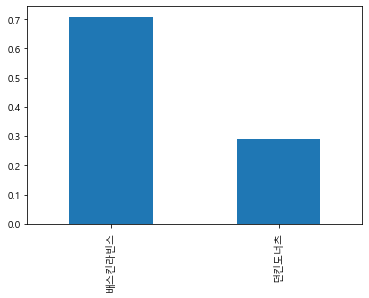

In [76]:
df_31['브랜드명'].value_counts(normalize=True).plot.bar()

In [89]:
import seaborn as sns
brand_count=df_31['브랜드명'].value_counts()

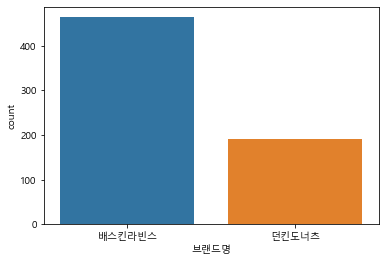

In [82]:
g=sns.countplot(data=df_31, x='브랜드명')

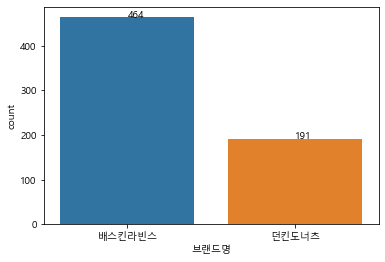

In [91]:
g=sns.countplot(data=df_31, x='브랜드명')
for i, value in enumerate(brand_count):
    g.text(x=i, y=value, s=value)

In [92]:
df_31[['위도','경도']]

,위도,경도
76,37.479599,126.952166
1167,37.559263,126.945369
1819,37.535713,127.095681
2164,37.552104,126.923809
2305,37.655101,127.050818
...,...,...
558894,37.495971,127.027989
560984,37.561436,127.038379
561929,37.479617,127.124872
561930,37.564954,127.174586


<AxesSubplot:xlabel='경도', ylabel='위도'>

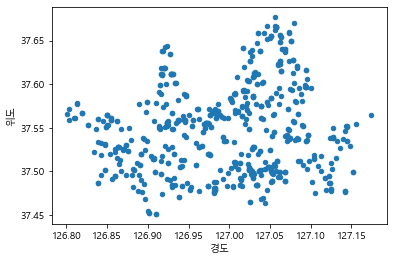

In [93]:
df_31[['위도','경도']].plot.scatter(x='경도', y='위도')

<AxesSubplot:xlabel='경도', ylabel='위도'>

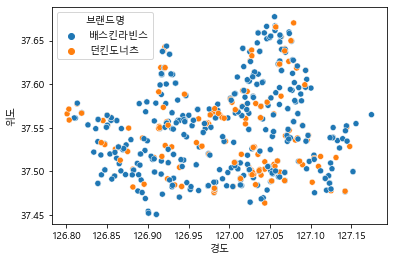

In [94]:
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

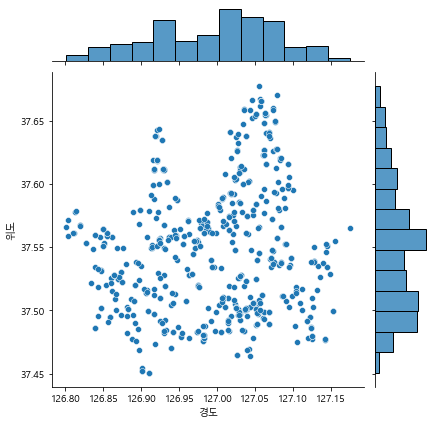

In [95]:
sns.jointplot(data=df_31, x='경도', y='위도')

In [96]:
import folium

In [99]:
lat=df_31['위도'].mean()
long=df_31['경도'].mean()

In [102]:
m=folium.Map([lat, long])

In [106]:
df_31.sample(random_state=31)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호명_소문자,브랜드명
276889,9100544,던킨도너츠,역삼4호점,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,서울특별시 강남구 논현로 341,135080,6248.0,1,NaN,101,127.039032,37.495593,던킨도너츠,던킨도너츠


In [110]:
folium.Marker([37.495593, 127.039032], popup='서울특별시 강남구 논현로 341', tooltip='던킨도너츠').add_to(m)

In [134]:

m=folium.Map([lat, long], zoom_start=12)
for i in df_31.index:
    sub_lat=df_31.loc[i, '위도']
    sub_long=df_31.loc[i, '경도']
    
    if df_31.loc[i, '브랜드명']=='던킨도너츠':
        color='red'
    else:
        color='blue'
    
    title=df_31.loc[i, '상호명']+'-'+df_31.loc[i, '도로명주소']
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=color),
                  popup=title,
                  tooltip=title).add_to(m)

In [135]:
m

In [141]:
from folium.plugins import MarkerCluster



m=folium.Map([lat, long], zoom_start=12)
marker_cluster=MarkerCluster().add_to(m)
for i in df_31.index:
    sub_lat=df_31.loc[i, '위도']
    sub_long=df_31.loc[i, '경도']
    
    if df_31.loc[i, '브랜드명']=='던킨도너츠':
        color='red'
    else:
        color='blue'
    
    title=df_31.loc[i, '상호명']+'-'+df_31.loc[i, '도로명주소']
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=color),
                  popup=title,
                  tooltip=title).add_to(marker_cluster)

In [142]:
m